In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf 
import statistics
import time
import statsmodels.api as sm

sns.set()

In [2]:
from sklearn.model_selection import train_test_split

from tensorflow import keras
from sklearn import preprocessing, model_selection
from sklearn import tree

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, ComplementNB
from sklearn.svm import SVC

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MaxAbsScaler

from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [3]:
all_data = pd.read_csv("stars_no_mass.csv")
all_data.head()

,HIP,Longitudine galactică,Latitudine galactică,Nume,Constelație,Tipul Spectral,Clasă de luminozitate,Index B-V (culoare),Magnitudine absolută(VMag),Luminozitate(Lum),Magnitudine aparentă (Vmag),Temperatură efectivă,Radius
0,89954,6.365408,-5.472347,NaN,Sagittarius,A,main-sequence,0.249,0.59,48.29,6.91,8017.0,3.051
1,86572,355.166046,-1.949273,NaN,Scorpius,A,main-sequence,0.149,1.10,30.55,7.51,8535.0,3.762
2,87144,357.100903,-2.423989,NaN,Scorpius,A,main-sequence,0.135,2.33,9.79,7.36,9051.0,1.680
3,87760,0.219325,-2.402130,NaN,Sagittarius,A,sub-giants,0.279,2.31,9.87,8.28,7700.0,2.147
4,87482,0.237614,-1.595092,NaN,Sagittarius,A,main-sequence,0.281,2.83,6.09,8.26,7423.0,2.322


In [4]:
all_data.describe()

,HIP,Longitudine galactică,Latitudine galactică,Index B-V (culoare),Magnitudine absolută(VMag),Luminozitate(Lum),Magnitudine aparentă (Vmag),Temperatură efectivă,Radius
count,53989.000000,53989.000000,53989.000000,53989.000000,53989.000000,53989.000000,53989.000000,53989.000000,53989.000000
mean,58745.366630,185.452419,-0.803755,0.637797,2.662249,48.245744,7.945110,6283.229997,5.528834
std,34393.495758,104.059164,38.766361,0.387531,1.985156,402.819463,1.239121,1585.075414,10.561782
min,3.000000,0.001255,-89.000111,-0.300000,-7.330000,0.000000,0.333000,3231.000000,0.143000
25%,28301.000000,95.051213,-30.174149,0.380000,1.210000,2.650000,7.200000,5024.000000,1.423000
50%,58967.000000,184.902472,-1.298169,0.568000,2.540000,8.610000,7.990000,6102.800000,2.100000
75%,88235.000000,278.896651,28.278193,0.950000,3.830000,36.000000,8.740000,6903.000000,4.739000
max,120403.000000,359.987037,89.583467,1.603000,13.240000,72888.610000,15.510000,34200.000000,686.095000


In [5]:
all_data['Tipul Spectral'] = all_data['Tipul Spectral'].map({'B': 0, 'A': 1, 'F': 2, 'G': 3, 'K': 4, 'M': 5})
all_data.head()

,HIP,Longitudine galactică,Latitudine galactică,Nume,Constelație,Tipul Spectral,Clasă de luminozitate,Index B-V (culoare),Magnitudine absolută(VMag),Luminozitate(Lum),Magnitudine aparentă (Vmag),Temperatură efectivă,Radius
0,89954,6.365408,-5.472347,NaN,Sagittarius,1,main-sequence,0.249,0.59,48.29,6.91,8017.0,3.051
1,86572,355.166046,-1.949273,NaN,Scorpius,1,main-sequence,0.149,1.10,30.55,7.51,8535.0,3.762
2,87144,357.100903,-2.423989,NaN,Scorpius,1,main-sequence,0.135,2.33,9.79,7.36,9051.0,1.680
3,87760,0.219325,-2.402130,NaN,Sagittarius,1,sub-giants,0.279,2.31,9.87,8.28,7700.0,2.147
4,87482,0.237614,-1.595092,NaN,Sagittarius,1,main-sequence,0.281,2.83,6.09,8.26,7423.0,2.322


In [6]:
stars = {
    'hip' : all_data['HIP'],
    'sptype' : all_data['Tipul Spectral'],
    'bv' : all_data['Index B-V (culoare)'],
    'vmag' : all_data['Magnitudine absolută(VMag)'],
    'rad' : all_data['Radius']
}
stars = pd.DataFrame.from_dict(stars)
stars.head()

,hip,sptype,bv,vmag,rad
0,89954,1,0.249,0.59,3.051
1,86572,1,0.149,1.10,3.762
2,87144,1,0.135,2.33,1.680
3,87760,1,0.279,2.31,2.147
4,87482,1,0.281,2.83,2.322


# Vizualize data

Tipul spectral:

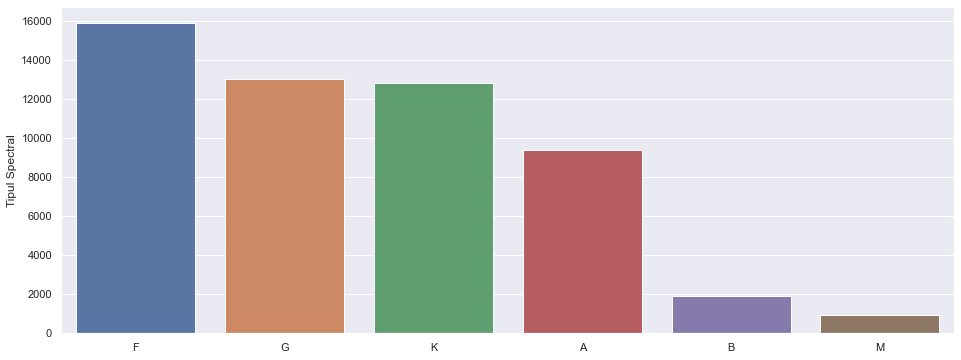

In [41]:
plt.figure(figsize=(16, 6))
spectral_types = pd.DataFrame(all_data["Tipul Spectral"].value_counts().sort_values(ascending=False))
ax = sns.barplot(x = spectral_types.index, y = 'Tipul Spectral' , data = spectral_types)

<AxesSubplot:>

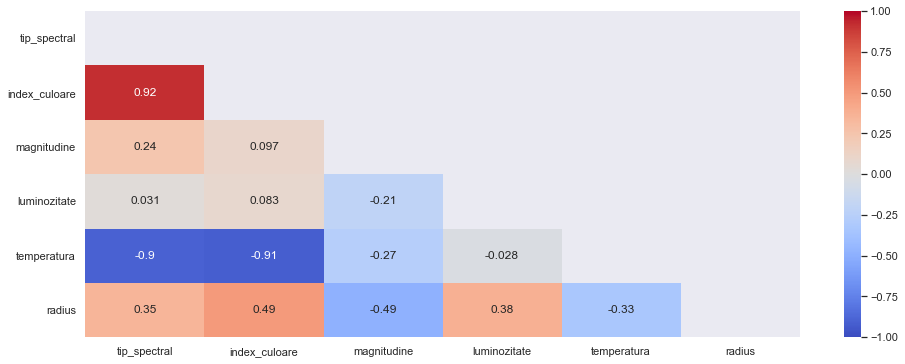

In [18]:
star_data = {
    'tip_spectral' : all_data['Tipul Spectral'],
    'index_culoare' : all_data['Index B-V (culoare)'],
    'magnitudine' : all_data['Magnitudine absolută(VMag)'],
    'luminozitate' : all_data['Luminozitate(Lum)'],
    'temperatura' : all_data['Temperatură efectivă'],
    'radius' : all_data['Radius']
}
star_data = pd.DataFrame.from_dict(star_data)
plt.figure(figsize=(16, 6))
mask = np.triu(star_data.corr())
sns.heatmap(star_data.corr(), annot=True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', mask=mask)

In [14]:
corr_matrix = star_data.corr(method ='pearson')
corr_matrix

,tip_spectral,index_culoare,magnitudine,luminozitate,temperatura,radius
tip_spectral,1.000000,0.920127,0.235366,0.030914,-0.902520,0.347058
index_culoare,0.920127,1.000000,0.096895,0.082724,-0.914104,0.493097
magnitudine,0.235366,0.096895,1.000000,-0.206831,-0.265498,-0.491057
luminozitate,0.030914,0.082724,-0.206831,1.000000,-0.027557,0.380213
temperatura,-0.902520,-0.914104,-0.265498,-0.027557,1.000000,-0.330388
radius,0.347058,0.493097,-0.491057,0.380213,-0.330388,1.000000


In [71]:
star_data.describe()

,tip_spectral,index_culoare,magnitudine,luminozitate,temperatura,radius
count,53989.000000,53989.000000,53989.000000,53989.000000,53989.000000,53989.000000
mean,2.385356,0.637797,2.662249,48.245744,6283.229997,5.528834
std,1.388997,0.387531,1.985156,402.819463,1585.075414,10.561782
min,0.000000,-0.300000,-7.330000,0.000000,3231.000000,0.143000
25%,2.000000,0.380000,1.210000,2.650000,5024.000000,1.423000
50%,2.000000,0.568000,2.540000,8.610000,6102.800000,2.100000
75%,4.000000,0.950000,3.830000,36.000000,6903.000000,4.739000
max,5.000000,1.603000,13.240000,72888.610000,34200.000000,686.095000


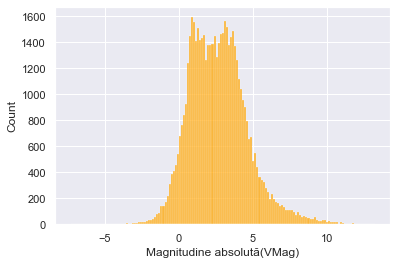

In [43]:
vmag = sns.histplot(all_data, x="Magnitudine absolută(VMag)", color="orange")

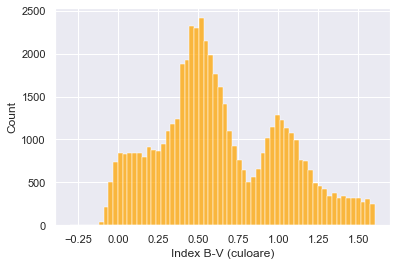

In [44]:
bv = sns.histplot(all_data, x="Index B-V (culoare)", color="orange")

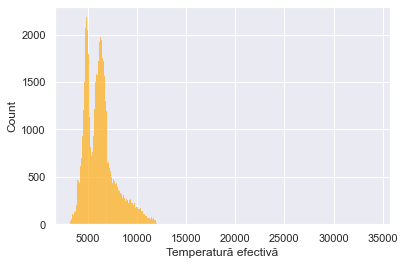

In [45]:
temp = sns.histplot(all_data, x="Temperatură efectivă", color="orange")

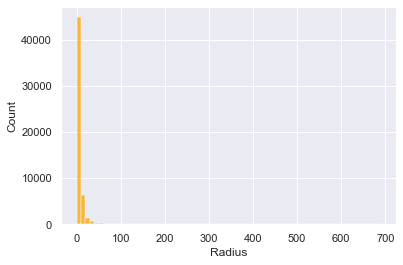

In [46]:
rad = sns.histplot(all_data, x="Radius", bins=50, binwidth=10, color="orange")

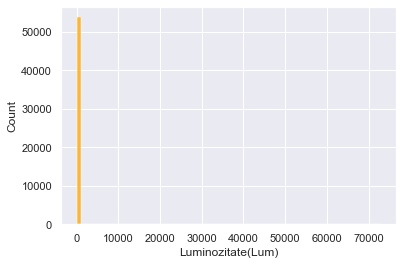

In [69]:
lum = sns.histplot(all_data, x="Luminozitate(Lum)", binwidth=1000, bins=5, color="orange")

<AxesSubplot:xlabel='Radius', ylabel='Count'>

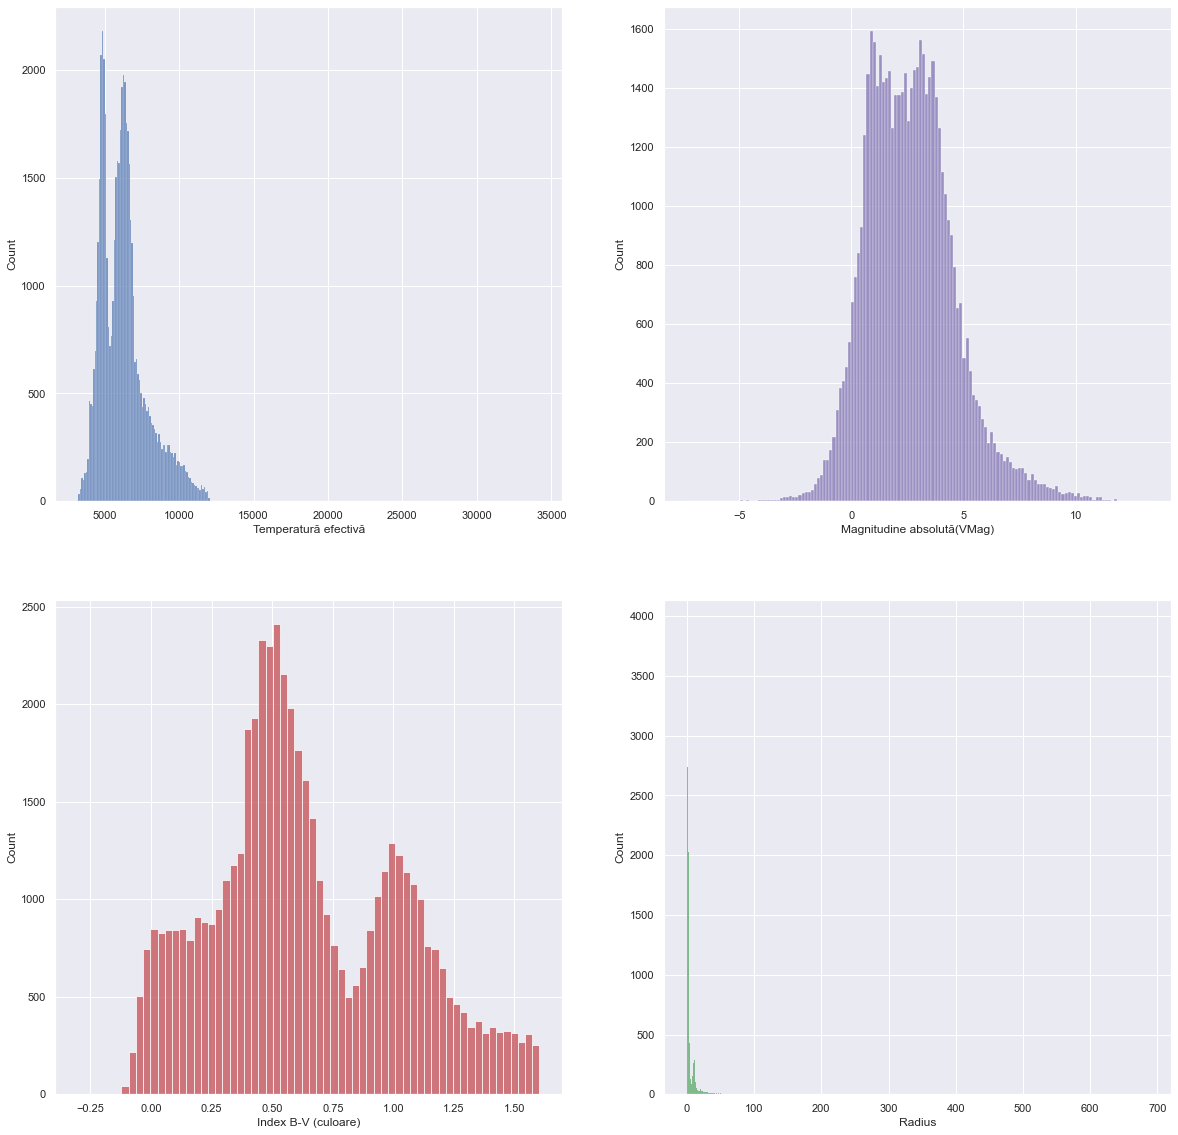

In [58]:
f, axes = plt.subplots(2, 2, figsize=(20, 20))

sns.histplot(all_data['Temperatură efectivă'], color='b', ax=axes[0, 0])
sns.histplot(all_data['Magnitudine absolută(VMag)'], color='m', ax=axes[0, 1])
sns.histplot(all_data['Index B-V (culoare)'], color='r', ax=axes[1, 0])
sns.histplot(all_data['Radius'], color='g', ax=axes[1, 1])

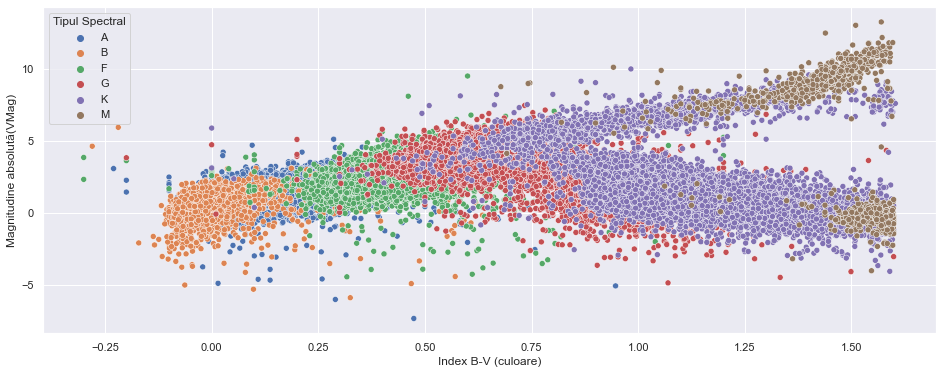

In [49]:
plt.figure(figsize=(16, 6))
g1 = sns.scatterplot(data=all_data, x='Index B-V (culoare)', y='Magnitudine absolută(VMag)', hue='Tipul Spectral')

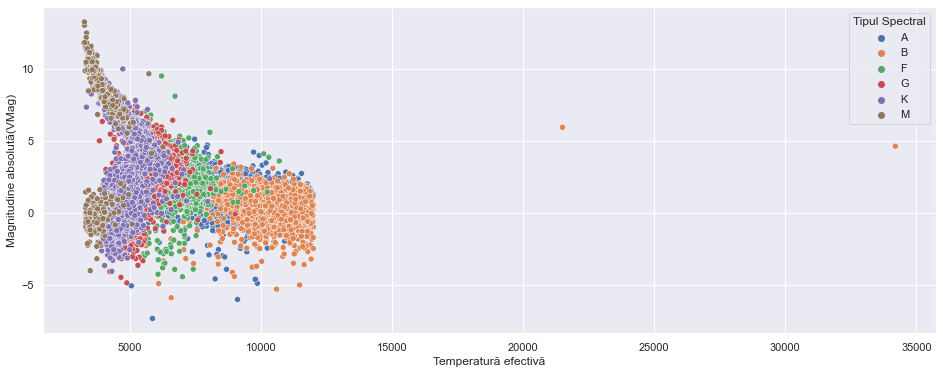

In [50]:
plt.figure(figsize=(16, 6))
g2 = sns.scatterplot(data=all_data, x='Temperatură efectivă', y='Magnitudine absolută(VMag)', hue='Tipul Spectral')

<Figure size 1800x1080 with 0 Axes>

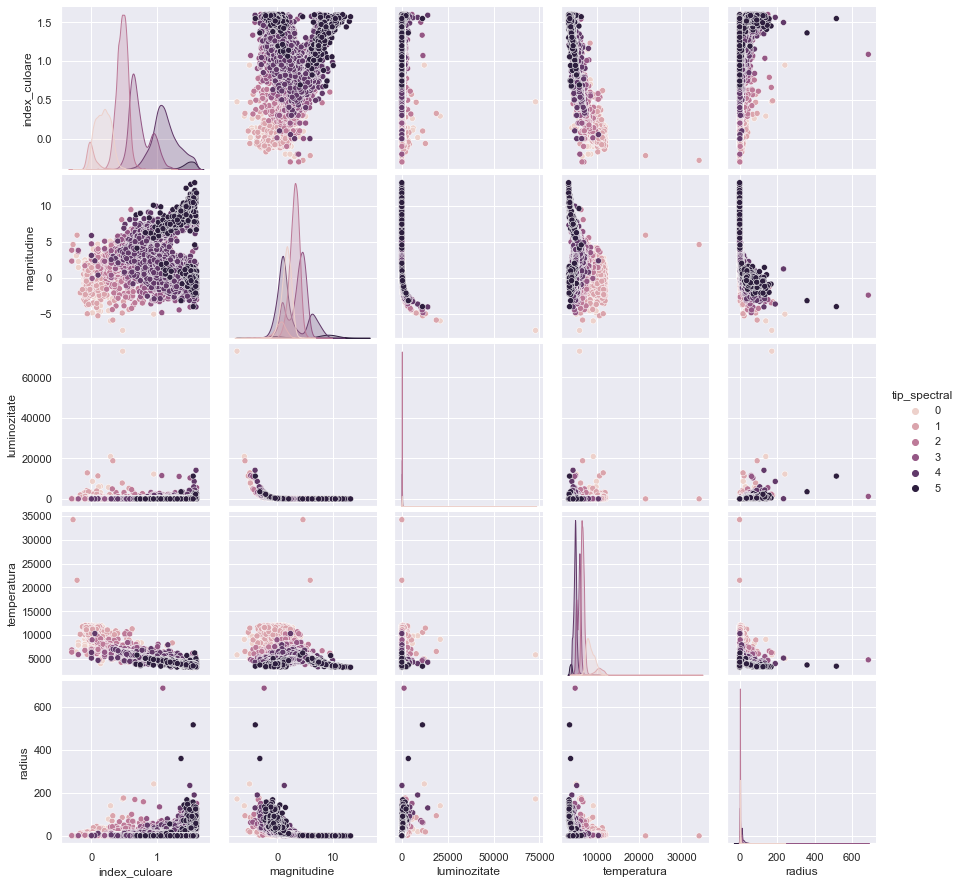

In [51]:
plt.figure(figsize=(25, 15))
sns.pairplot(data = star_data, hue = "tip_spectral")

## Verificam existenta outliers

<AxesSubplot:xlabel='Tipul Spectral', ylabel='Temperatură efectivă'>

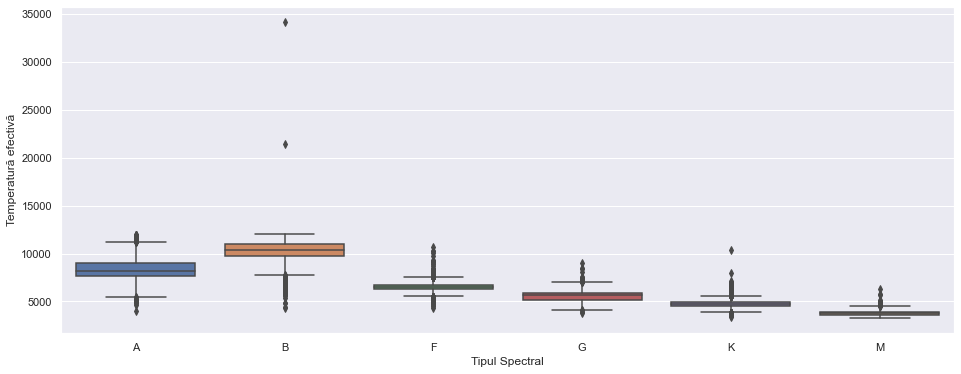

In [52]:
plt.figure(figsize=(16, 6))
sns.boxplot(x=all_data['Tipul Spectral'], y=all_data['Temperatură efectivă'])

<AxesSubplot:xlabel='Tipul Spectral', ylabel='Index B-V (culoare)'>

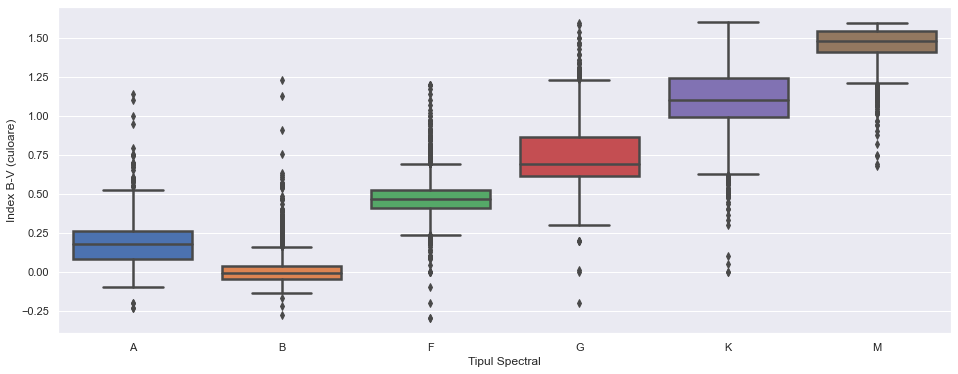

In [53]:
plt.figure(figsize=(16, 6))
sns.boxplot(x=all_data['Tipul Spectral'], y=all_data['Index B-V (culoare)'], linewidth=2.5, saturation=1)

<AxesSubplot:xlabel='Tipul Spectral', ylabel='Magnitudine absolută(VMag)'>

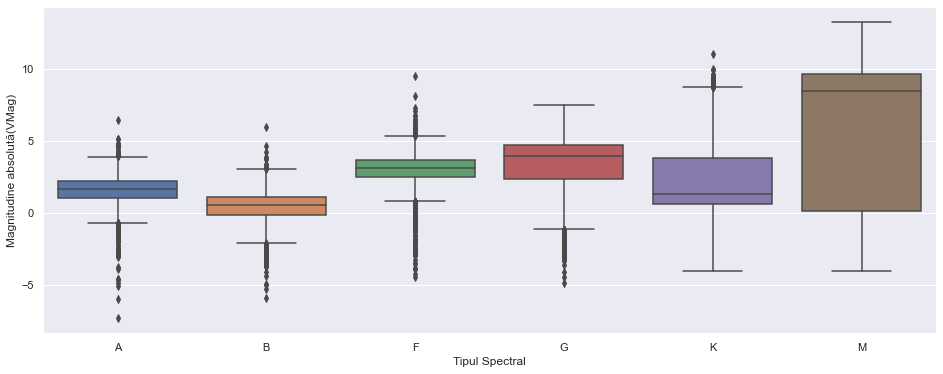

In [54]:
plt.figure(figsize=(16, 6))
sns.boxplot(x=all_data['Tipul Spectral'], y=all_data['Magnitudine absolută(VMag)'])

# Data Preprocessing

In [7]:
stars.dtypes

hip         int64
sptype      int64
bv        float64
vmag      float64
rad       float64
dtype: object

In [8]:
stars['sptype'] = stars['sptype'].astype(float)
stars1 = stars.copy()
stars1.head()

,hip,sptype,bv,vmag,rad
0,89954,1.0,0.249,0.59,3.051
1,86572,1.0,0.149,1.10,3.762
2,87144,1.0,0.135,2.33,1.680
3,87760,1.0,0.279,2.31,2.147
4,87482,1.0,0.281,2.83,2.322


### Data Scaling

>NoScaler

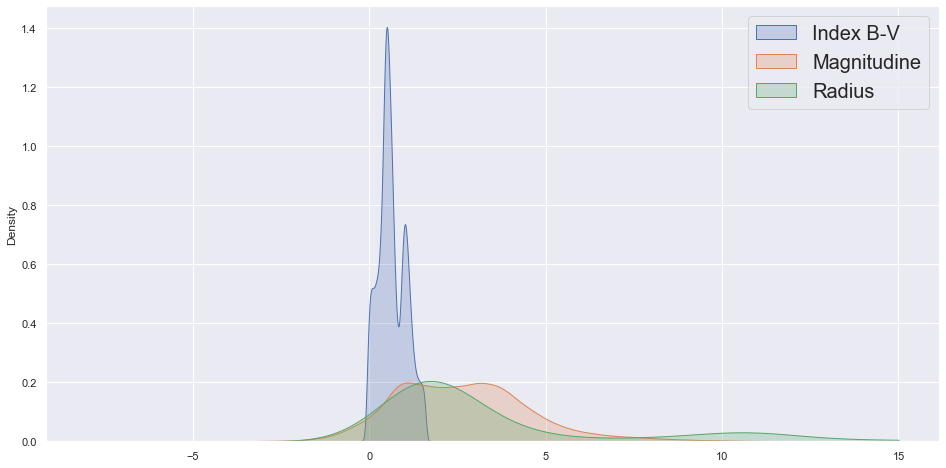

In [16]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(16, 8))
bv = sns.kdeplot(stars['bv'], label='Index B-V', fill=True, ax=ax1)
mag = sns.kdeplot(stars['vmag'], label='Magnitudine', fill=True, ax=ax1)
rad = sns.kdeplot(stars['rad'], label='Radius', clip=(-25,15), fill=True, ax=ax1)
plt.xlabel("")
plt.legend(fontsize=20)
fig.savefig('fill.png', transparent=True)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(stars.drop(['hip','sptype'],axis=1), stars['sptype'], test_size=0.20)
print("X_train shape is", X_train.shape)
print("X_test shape is", X_test.shape)
print("y_train shape is", y_train.shape)
print("y_test shape is", y_test.shape)

X_train shape is (43191, 3)
X_test shape is (10798, 3)
y_train shape is (43191,)
y_test shape is (10798,)


#### LogisticRegression

In [23]:
logreg = LogisticRegression(max_iter=1000000)

t0=time.time()
logreg.fit(X_train, y_train)
print("training time:", round(time.time()-t0, 3), "s")

t1=time.time()
predictions = logreg.predict(X_test)
print("predict time:", round(time.time()-t1, 3), "s")

print(classification_report(y_test, predictions, zero_division=0))



training time: 27.492 s
predict time: 0.005 s
              precision    recall  f1-score   support

         0.0       0.72      0.32      0.44       368
         1.0       0.81      0.86      0.83      1878
         2.0       0.84      0.89      0.86      3186
         3.0       0.81      0.75      0.78      2682
         4.0       0.83      0.88      0.85      2490
         5.0       0.78      0.55      0.65       194

    accuracy                           0.82     10798
   macro avg       0.80      0.71      0.74     10798
weighted avg       0.82      0.82      0.82     10798



In [27]:
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

#### RandomForest

In [14]:
rfc = RandomForestClassifier()

t0=time.time()
rfc.fit(X_train,y_train)
print("training time:", round(time.time()-t0, 3), "s")

t1=time.time()
pred_rfc = rfc.predict(X_test)
print("predict time:", round(time.time()-t1, 3), "s")

print(classification_report(y_test, pred_rfc, zero_division=0))

training time: 5.231 s
predict time: 0.315 s
              precision    recall  f1-score   support

         0.0       0.69      0.56      0.62       371
         1.0       0.82      0.85      0.84      1900
         2.0       0.86      0.87      0.86      3186
         3.0       0.78      0.76      0.77      2544
         4.0       0.85      0.87      0.86      2612
         5.0       0.79      0.64      0.71       185

    accuracy                           0.82     10798
   macro avg       0.80      0.76      0.78     10798
weighted avg       0.82      0.82      0.82     10798



#### Gaussian Naive Bayes

In [10]:
gnc = GaussianNB()

t0=time.time()
gnc.fit(X_train,y_train)
print("training time:", round(time.time()-t0, 3), "s")

t1=time.time()
pred_gnc = gnc.predict(X_test)
print("predict time:", round(time.time()-t1, 3), "s")

print(classification_report(y_test, pred_gnc, zero_division=0))

training time: 0.095 s
predict time: 0.113 s
              precision    recall  f1-score   support

         0.0       0.67      0.40      0.50       385
         1.0       0.81      0.83      0.82      1891
         2.0       0.74      0.92      0.82      3184
         3.0       0.70      0.51      0.59      2574
         4.0       0.78      0.76      0.77      2576
         5.0       0.55      0.73      0.62       188

    accuracy                           0.75     10798
   macro avg       0.71      0.69      0.69     10798
weighted avg       0.75      0.75      0.74     10798



#### Support Vector Classifier 

In [9]:
svc = SVC(kernel='rbf')

t0=time.time()
svc.fit(X_train,y_train)
print("training time:", round(time.time()-t0, 3), "s")

t1=time.time()
pred_svc = svc.predict(X_test)
print("predict time:", round(time.time()-t1, 3), "s")

print(classification_report(y_test, pred_svc, zero_division=0))

training time: 33.465 s
predict time: 36.336 s
              precision    recall  f1-score   support

         0.0       0.77      0.06      0.11       371
         1.0       0.76      0.84      0.80      1900
         2.0       0.80      0.86      0.83      3186
         3.0       0.75      0.60      0.67      2544
         4.0       0.77      0.90      0.83      2612
         5.0       0.78      0.57      0.66       185

    accuracy                           0.77     10798
   macro avg       0.77      0.64      0.65     10798
weighted avg       0.77      0.77      0.76     10798



In [61]:
svc = SVC(kernel='linear')

t0=time.time()
svc.fit(X_train,y_train)
print("training time:", round(time.time()-t0, 3), "s")

t1=time.time()
pred_svc = svc.predict(X_test)
print("predict time:", round(time.time()-t1, 3), "s")

print(classification_report(y_test, pred_svc, zero_division=0))

training time: 23.297 s
predict time: 5.505 s
              precision    recall  f1-score   support

         0.0       0.71      0.40      0.52       403
         1.0       0.81      0.86      0.83      1848
         2.0       0.85      0.88      0.87      3216
         3.0       0.80      0.75      0.77      2608
         4.0       0.84      0.87      0.86      2546
         5.0       0.76      0.66      0.71       177

    accuracy                           0.82     10798
   macro avg       0.80      0.74      0.76     10798
weighted avg       0.82      0.82      0.82     10798



#### DecisionTreeClassifier

Best accuracy score |0.8278384886090017| achieved at max depth |8|


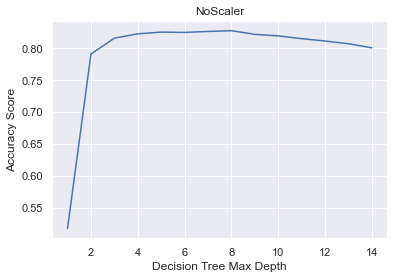

In [70]:
accuracy_scores = []
max_depths = []

for max_depth in range(1, 15):
    model = DecisionTreeClassifier(max_depth = max_depth)
    model.fit(X_train, y_train)

    test_prediction = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_prediction)

    max_depths.append(max_depth)
    accuracy_scores.append(test_accuracy)

ax = sns.lineplot(x = max_depths, y = accuracy_scores)
ax.set(title='NoScaler', xlabel='Decision Tree Max Depth', ylabel='Accuracy Score')
print(f'Best accuracy score |{max(accuracy_scores)}| achieved at max depth |{np.argmax(accuracy_scores) + 1}|')

In [67]:
dtc = DecisionTreeClassifier(max_depth = 6)
t0=time.time()
dtc.fit(X_train, y_train)
print("training time:", round(time.time()-t0, 3), "s")

t1=time.time()
dtc_pred = dtc.predict(X_test)
print("predict time:", round(time.time()-t1, 3), "s")

print(classification_report(y_test, dtc_pred, zero_division=0))

training time: 0.088 s
predict time: 0.003 s
              precision    recall  f1-score   support

         0.0       0.77      0.50      0.60       383
         1.0       0.83      0.87      0.85      1820
         2.0       0.85      0.89      0.87      3221
         3.0       0.79      0.76      0.78      2644
         4.0       0.85      0.86      0.86      2549
         5.0       0.79      0.57      0.66       181

    accuracy                           0.83     10798
   macro avg       0.81      0.74      0.77     10798
weighted avg       0.83      0.83      0.83     10798



>StandardScaler

In [9]:
stars2 = stars.copy()
stars2.head()

scaler = StandardScaler()

stars2['vmag'] = scaler.fit_transform(np.expand_dims(stars2['vmag'], axis=1))
stars2['rad'] = scaler.fit_transform(np.expand_dims(stars2['rad'], axis=1))
stars2['bv'] = scaler.fit_transform(np.expand_dims(stars2['bv'], axis=1))

stars2.head()

,hip,sptype,bv,vmag,rad
0,89954,1.0,-1.003278,-1.043882,-0.234606
1,86572,1.0,-1.261324,-0.786973,-0.167287
2,87144,1.0,-1.297451,-0.167368,-0.364415
3,87760,1.0,-0.925864,-0.177443,-0.320198
4,87482,1.0,-0.920703,0.084503,-0.303629


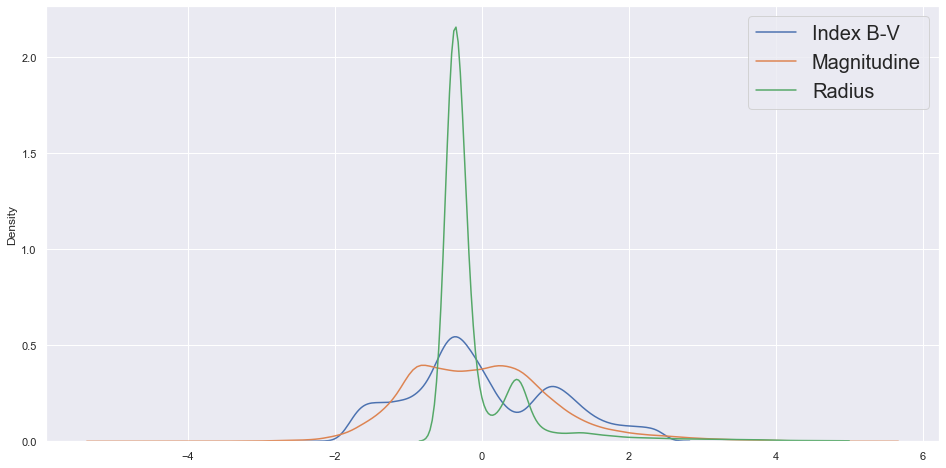

In [18]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(16, 8))
bv = sns.kdeplot(stars2['bv'], label='Index B-V', ax=ax1)
mag = sns.kdeplot(stars2['vmag'], label='Magnitudine', ax=ax1)
rad = sns.kdeplot(stars2['rad'], label='Radius', clip=(-5,5), ax=ax1)
plt.xlabel("")
plt.legend(fontsize=20)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(stars2.drop(['hip','sptype'],axis=1), stars2['sptype'], test_size=0.20)
print("X_train shape is", X_train.shape)
print("X_test shape is", X_test.shape)
print("y_train shape is", y_train.shape)
print("y_test shape is", y_test.shape)

X_train shape is (43191, 3)
X_test shape is (10798, 3)
y_train shape is (43191,)
y_test shape is (10798,)


In [35]:
kne =  KNeighborsClassifier()

t0=time.time()
kne.fit(X_train, y_train)
print("training time:", round(time.time()-t0, 3), "s")

t1=time.time()
predictions = kne.predict(X_test)
print("predict time:", round(time.time()-t1, 3), "s")

print(classification_report(y_test, predictions, zero_division=0))

training time: 0.091 s
predict time: 0.349 s
              precision    recall  f1-score   support

         0.0       0.67      0.58      0.62       373
         1.0       0.83      0.85      0.84      1837
         2.0       0.85      0.86      0.86      3203
         3.0       0.77      0.73      0.75      2641
         4.0       0.82      0.86      0.84      2553
         5.0       0.76      0.55      0.64       191

    accuracy                           0.81     10798
   macro avg       0.78      0.74      0.76     10798
weighted avg       0.81      0.81      0.81     10798



#### Neural Network

In [9]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(3,)))
model.add(tf.keras.layers.Dense(226,activation = "relu"))
model.add(tf.keras.layers.Dense(64,activation = "relu"))
model.add(tf.keras.layers.Dense(32,activation = "relu"))
model.add(tf.keras.layers.Dense(6,activation = "softmax"))


model.compile(optimizer = tf.keras.optimizers.Adam(),
       loss = 'sparse_categorical_crossentropy',
       metrics=['accuracy'])

In [10]:
nn = model.fit(X_train,y_train, epochs = 100)

Epoch 1/100
1350/1350 [==============================] - 4s 1ms/step - loss: 0.6728 - accuracy: 0.7705
Epoch 2/100
1350/1350 [==============================] - 2s 1ms/step - loss: 0.4509 - accuracy: 0.8208
Epoch 3/100
1350/1350 [==============================] - 2s 1ms/step - loss: 0.4479 - accuracy: 0.8214
Epoch 4/100
1350/1350 [==============================] - 1s 1ms/step - loss: 0.4423 - accuracy: 0.8226
Epoch 5/100
1350/1350 [==============================] - 2s 1ms/step - loss: 0.4373 - accuracy: 0.8247
Epoch 6/100
1350/1350 [==============================] - 2s 1ms/step - loss: 0.4397 - accuracy: 0.8235
Epoch 7/100
1350/1350 [==============================] - 2s 1ms/step - loss: 0.4460 - accuracy: 0.8227
Epoch 8/100
1350/1350 [==============================] - 2s 1ms/step - loss: 0.4311 - accuracy: 0.8307
Epoch 9/100
1350/1350 [==============================] - 2s 1ms/step - loss: 0.4405 - accuracy: 0.8250
Epoch 10/100
1350/1350 [==============================] - 2s 1ms/step - l

In [11]:
val_loss,val_acc = model.evaluate(X_test,y_test)
print("Loss % = {} , Accuracy % = {} ".format(val_loss*100,val_acc*100))

338/338 [==============================] - 1s 864us/step - loss: 0.4290 - accuracy: 0.8243
Loss % = 42.89628565311432 , Accuracy % = 82.43193030357361 


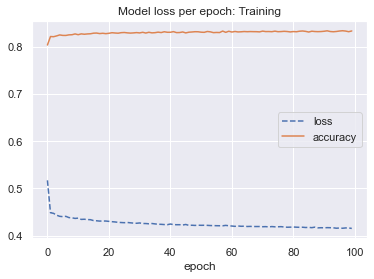

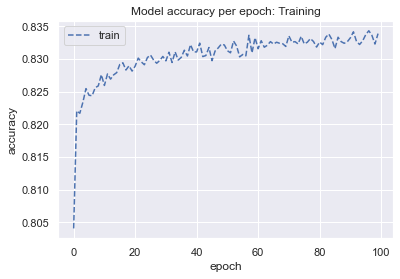

In [12]:
nn.history.keys()

plt.figure(1)
plt.plot(nn.history['loss'], '--')
plt.plot(nn.history['accuracy'], '-')
plt.title('Model loss per epoch: Training')
plt.ylabel('')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy'])
plt.show()

plt.figure(2)
plt.plot(nn.history['accuracy'], '--')
plt.title('Model accuracy per epoch: Training')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'])
plt.show()

#### Logistic regression

In [17]:
logreg = LogisticRegression(max_iter=100000)

t0=time.time()
result=logreg.fit(X_train, y_train)
print("training time:", round(time.time()-t0, 3), "s")

t1=time.time()
predictions = logreg.predict(X_test)
print("predict time:", round(time.time()-t1, 3), "s")

print(classification_report(y_test, predictions, zero_division=0))
pd.DataFrame(zip(X_train.columns, np.transpose(logreg.coef_.tolist()[0])), columns=['features', 'coef'])

training time: 2.411 s
predict time: 0.0 s
              precision    recall  f1-score   support

         0.0       0.80      0.46      0.58       380
         1.0       0.82      0.87      0.85      1823
         2.0       0.85      0.88      0.86      3244
         3.0       0.78      0.74      0.76      2607
         4.0       0.83      0.86      0.85      2556
         5.0       0.70      0.54      0.61       188

    accuracy                           0.82     10798
   macro avg       0.80      0.73      0.75     10798
weighted avg       0.82      0.82      0.82     10798



,features,coef
0,bv,-16.736598
1,vmag,-2.679685
2,rad,0.554216


#### DecisionTreeClassifier

Best accuracy score |0.8245045378773846| achieved at max depth |8|


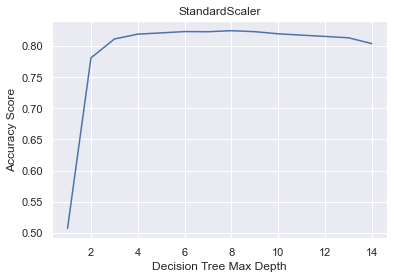

In [74]:
accuracy_scores = []
max_depths = []

for max_depth in range(1, 15):
    model = DecisionTreeClassifier(max_depth = max_depth)
    model.fit(X_train, y_train)

    test_prediction = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_prediction)

    max_depths.append(max_depth)
    accuracy_scores.append(test_accuracy)

ax = sns.lineplot(x = max_depths, y = accuracy_scores)
ax.set(title='StandardScaler', xlabel='Decision Tree Max Depth', ylabel='Accuracy Score')
print(f'Best accuracy score |{max(accuracy_scores)}| achieved at max depth |{np.argmax(accuracy_scores) + 1}|')

In [34]:
dtc = DecisionTreeClassifier(max_depth = 8)
t0=time.time()
dtc.fit(X_train, y_train)
print("training time:", round(time.time()-t0, 3), "s")

t1=time.time()
dtc_pred = dtc.predict(X_test)
print("predict time:", round(time.time()-t1, 3), "s")

print(classification_report(y_test, dtc_pred, zero_division=0))

training time: 0.107 s
predict time: 0.004 s
              precision    recall  f1-score   support

         0.0       0.69      0.65      0.67       377
         1.0       0.85      0.85      0.85      1860
         2.0       0.86      0.87      0.87      3207
         3.0       0.79      0.76      0.77      2643
         4.0       0.84      0.88      0.86      2531
         5.0       0.82      0.59      0.69       180

    accuracy                           0.83     10798
   macro avg       0.81      0.77      0.78     10798
weighted avg       0.83      0.83      0.83     10798



#### RandomForest

Best accuracy score |0.8320059270235228| achieved at max depth |11|


[Text(0.5, 0, 'Random Forest Max Depth'), Text(0, 0.5, 'Accuracy Score')]

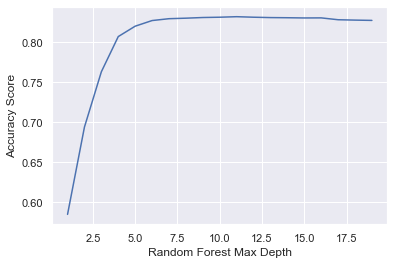

In [35]:
accuracy_scores = []
max_depths = []

for max_depth in range(1, 20):
    rfc = RandomForestClassifier(n_estimators=100, max_depth = max_depth)
    rfc.fit(X_train,y_train)

    pred_rfc = rfc.predict(X_test)
    test_accuracy = accuracy_score(y_test, pred_rfc)

    max_depths.append(max_depth)
    accuracy_scores.append(test_accuracy)

print(f'Best accuracy score |{max(accuracy_scores)}| achieved at max depth |{np.argmax(accuracy_scores) + 1}|')
ax = sns.lineplot(x = max_depths, y = accuracy_scores)
ax.set(xlabel='Random Forest Max Depth', ylabel='Accuracy Score')

In [36]:
rfc = RandomForestClassifier(max_depth = 11)

t0=time.time()
rfc.fit(X_train, y_train)
print("training time:", round(time.time()-t0, 3), "s")

t1=time.time()
pred_rfc = rfc.predict(X_test)
print("predict time:", round(time.time()-t1, 3), "s")

print(classification_report(y_test, pred_rfc, zero_division=0))

training time: 3.703 s
predict time: 0.176 s
              precision    recall  f1-score   support

         0.0       0.74      0.62      0.67       377
         1.0       0.85      0.87      0.86      1860
         2.0       0.85      0.88      0.87      3207
         3.0       0.79      0.75      0.77      2643
         4.0       0.84      0.88      0.86      2531
         5.0       0.83      0.64      0.72       180

    accuracy                           0.83     10798
   macro avg       0.82      0.77      0.79     10798
weighted avg       0.83      0.83      0.83     10798



#### GaussianNB

In [49]:
gnc = GaussianNB()

t0=time.time()
gnc.fit(X_train,y_train)
print("training time:", round(time.time()-t0, 3), "s")

t1=time.time()
pred_gnc = gnc.predict(X_test)
print("predict time:", round(time.time()-t1, 3), "s")
print(classification_report(y_test, pred_gnc, zero_division=0))

training time: 0.017 s
predict time: 0.005 s
              precision    recall  f1-score   support

         0.0       0.67      0.39      0.50       390
         1.0       0.79      0.84      0.81      1835
         2.0       0.75      0.93      0.83      3194
         3.0       0.71      0.51      0.59      2573
         4.0       0.78      0.77      0.78      2622
         5.0       0.50      0.65      0.57       184

    accuracy                           0.75     10798
   macro avg       0.70      0.68      0.68     10798
weighted avg       0.75      0.75      0.74     10798



#### Support Vector Classifier 

In [38]:
svc = SVC(kernel='poly')
t0=time.time()
svc.fit(X_train,y_train)
print("training time:", round(time.time()-t0, 3), "s")

t1=time.time()
pred_svc = svc.predict(X_test)
print("predict time:", round(time.time()-t1, 3), "s")
print(classification_report(y_test, pred_svc, zero_division=0))

training time: 23.653 s
predict time: 6.202 s
              precision    recall  f1-score   support

         0.0       0.75      0.58      0.65       377
         1.0       0.86      0.85      0.86      1860
         2.0       0.78      0.93      0.85      3207
         3.0       0.78      0.68      0.73      2643
         4.0       0.86      0.83      0.85      2531
         5.0       0.85      0.58      0.69       180

    accuracy                           0.81     10798
   macro avg       0.81      0.74      0.77     10798
weighted avg       0.82      0.81      0.81     10798



In [20]:
svc = SVC(kernel='rbf')
t0=time.time()
svc.fit(X_train,y_train)
print("training time:", round(time.time()-t0, 3), "s")

t1=time.time()
pred_svc = svc.predict(X_test)
print("predict time:", round(time.time()-t1, 3), "s")
print(classification_report(y_test, pred_svc, zero_division=0))

training time: 129.359 s
predict time: 22.433 s
              precision    recall  f1-score   support

         0.0       0.76      0.51      0.61       362
         1.0       0.84      0.86      0.85      1910
         2.0       0.84      0.88      0.86      3137
         3.0       0.81      0.75      0.78      2662
         4.0       0.85      0.88      0.86      2561
         5.0       0.78      0.51      0.62       166

    accuracy                           0.83     10798
   macro avg       0.81      0.73      0.76     10798
weighted avg       0.83      0.83      0.83     10798



In [40]:
svc = SVC(kernel='linear')
t0=time.time()
svc.fit(X_train,y_train)
print("training time:", round(time.time()-t0, 3), "s")

t1=time.time()
pred_svc = svc.predict(X_test)
print("predict time:", round(time.time()-t1, 3), "s")
print(classification_report(y_test, pred_svc, zero_division=0))

training time: 14.315 s
predict time: 4.954 s
              precision    recall  f1-score   support

         0.0       0.74      0.53      0.62       377
         1.0       0.84      0.87      0.86      1860
         2.0       0.85      0.88      0.87      3207
         3.0       0.79      0.76      0.77      2643
         4.0       0.85      0.87      0.86      2531
         5.0       0.76      0.63      0.69       180

    accuracy                           0.83     10798
   macro avg       0.81      0.76      0.78     10798
weighted avg       0.83      0.83      0.83     10798



>MinMax Scaler

In [19]:
stars3 = stars.copy()
stars3.head()

scaler = MinMaxScaler()

stars3['vmag'] = scaler.fit_transform(np.expand_dims(stars3['vmag'], axis=1))
stars3['rad'] = scaler.fit_transform(np.expand_dims(stars3['rad'], axis=1))
stars3['bv'] = scaler.fit_transform(np.expand_dims(stars3['bv'], axis=1))

stars3.head()

,hip,sptype,bv,vmag,rad
0,89954,1.0,0.288492,0.385027,0.004239
1,86572,1.0,0.235943,0.409820,0.005276
2,87144,1.0,0.228586,0.469616,0.002241
3,87760,1.0,0.304256,0.468644,0.002921
4,87482,1.0,0.305307,0.493923,0.003177


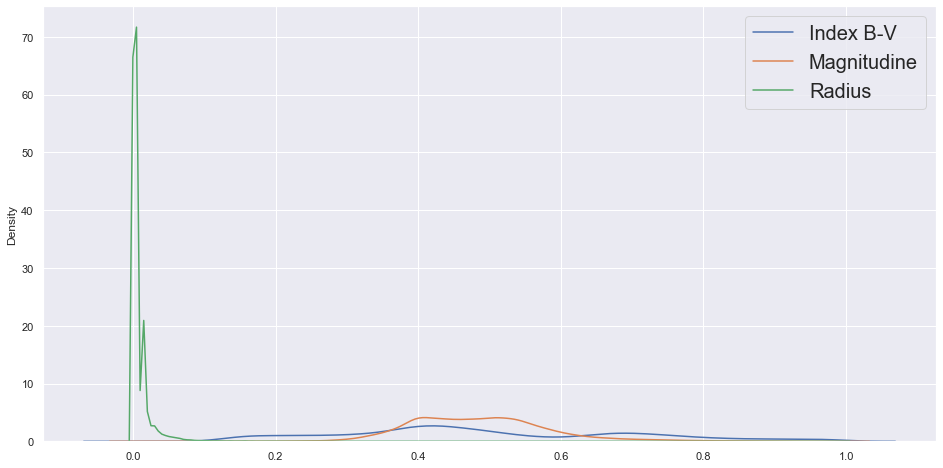

In [21]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(16, 8))
bv = sns.kdeplot(stars3['bv'], label='Index B-V', ax=ax1)
mag = sns.kdeplot(stars3['vmag'], label='Magnitudine', ax=ax1)
rad = sns.kdeplot(stars3['rad'], label='Radius', clip=(-5,5), ax=ax1)
plt.xlabel("")
plt.legend(fontsize=20)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(stars3.drop(['hip','sptype'],axis=1), stars3['sptype'], test_size=0.20)
print("X_train shape is", X_train.shape)
print("X_test shape is", X_test.shape)
print("y_train shape is", y_train.shape)
print("y_test shape is", y_test.shape)

X_train shape is (43191, 3)
X_test shape is (10798, 3)
y_train shape is (43191,)
y_test shape is (10798,)


#### Neural Network

In [53]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(3,)))
model.add(tf.keras.layers.Dense(256,activation = "relu"))
model.add(tf.keras.layers.Dense(64,activation = "relu"))
model.add(tf.keras.layers.Dense(32,activation = "relu"))
model.add(tf.keras.layers.Dense(6,activation = "softmax"))


model.compile(optimizer = tf.keras.optimizers.Adam(),
       loss = 'sparse_categorical_crossentropy',
       metrics=['accuracy'])

In [54]:
model.fit(X_train,y_train, epochs = 100)

Epoch 1/100
1350/1350 [==============================] - 2s 1ms/step - loss: 0.7072 - accuracy: 0.7604
Epoch 2/100
1350/1350 [==============================] - 2s 1ms/step - loss: 0.4513 - accuracy: 0.8205
Epoch 3/100
1350/1350 [==============================] - 2s 1ms/step - loss: 0.4604 - accuracy: 0.8151
Epoch 4/100
1350/1350 [==============================] - 2s 1ms/step - loss: 0.4451 - accuracy: 0.8232
Epoch 5/100
1350/1350 [==============================] - 2s 1ms/step - loss: 0.4364 - accuracy: 0.8267
Epoch 6/100
1350/1350 [==============================] - 2s 1ms/step - loss: 0.4389 - accuracy: 0.8238
Epoch 7/100
1350/1350 [==============================] - 2s 1ms/step - loss: 0.4336 - accuracy: 0.8252
Epoch 8/100
1350/1350 [==============================] - 2s 1ms/step - loss: 0.4410 - accuracy: 0.8221
Epoch 9/100
1350/1350 [==============================] - 2s 1ms/step - loss: 0.4320 - accuracy: 0.8261
Epoch 10/100
1350/1350 [==============================] - 2s 1ms/step - l

In [55]:
val_loss,val_acc = model.evaluate(X_test,y_test)
print("Loss % = {} , Accuracy % = {} ".format(val_loss*100,val_acc*100))

338/338 [==============================] - 1s 866us/step - loss: 0.4310 - accuracy: 0.8322
Loss % = 43.10057759284973 , Accuracy % = 83.21911692619324 


#### LogisticRegression

In [23]:
s_logreg = LogisticRegression(max_iter=1000000)

t0=time.time()
s_logreg.fit(X_train, y_train)
print("training time:", round(time.time()-t0, 3), "s")

t1=time.time()
s_pred_lreg = s_logreg.predict(X_test)
print("predict time:", round(time.time()-t1, 3), "s")

print(classification_report(y_test, s_pred_lreg, zero_division=0))

training time: 5.807 s
predict time: 0.003 s
              precision    recall  f1-score   support

         0.0       0.81      0.12      0.20       380
         1.0       0.79      0.86      0.82      1887
         2.0       0.83      0.91      0.87      3245
         3.0       0.80      0.71      0.76      2575
         4.0       0.82      0.88      0.85      2521
         5.0       0.91      0.34      0.49       190

    accuracy                           0.81     10798
   macro avg       0.83      0.64      0.66     10798
weighted avg       0.81      0.81      0.80     10798



#### RandomForest

Best accuracy score |0.8333024634191517| achieved at max depth |10|


[Text(0.5, 0, 'Random Forest Max Depth'), Text(0, 0.5, 'Accuracy Score')]

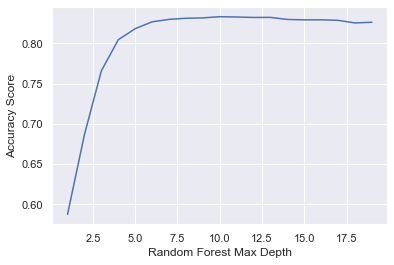

In [21]:
sr_accuracy_scores = []
sr_max_depths = []

for sr_max_depth in range(1, 20):
    sr_rfc = RandomForestClassifier(n_estimators=100, max_depth = sr_max_depth)
    sr_rfc.fit(X_train,y_train)

    sr_pred_rfc = sr_rfc.predict(X_test)
    sr_test_accuracy = accuracy_score(y_test, sr_pred_rfc)

    sr_max_depths.append(sr_max_depth)
    sr_accuracy_scores.append(sr_test_accuracy)

print(f'Best accuracy score |{max(sr_accuracy_scores)}| achieved at max depth |{np.argmax(sr_accuracy_scores) + 1}|')

ax = sns.lineplot(x = sr_max_depths, y = sr_accuracy_scores)
ax.set(xlabel='Random Forest Max Depth', ylabel='Accuracy Score')

In [22]:
s_rfc = RandomForestClassifier(n_estimators=100, max_depth = 10)

t0=time.time()
s_rfc.fit(X_train,y_train)
print("training time:", round(time.time()-t0, 3), "s")

t1=time.time()
s_pred_rfc = s_rfc.predict(X_test)
print("predict time:", round(time.time()-t1, 3), "s")

print(classification_report(y_test, s_pred_rfc, zero_division=0))

training time: 3.433 s
predict time: 0.191 s
              precision    recall  f1-score   support

         0.0       0.77      0.53      0.63       412
         1.0       0.84      0.85      0.84      1879
         2.0       0.84      0.89      0.86      3170
         3.0       0.81      0.76      0.78      2628
         4.0       0.85      0.89      0.87      2531
         5.0       0.85      0.62      0.71       178

    accuracy                           0.83     10798
   macro avg       0.83      0.76      0.78     10798
weighted avg       0.83      0.83      0.83     10798



#### Gaussian Naive Bayes

In [52]:
s_gnc = GaussianNB()

t0=time.time()
s_gnc.fit(X_train,y_train)
print("training time:", round(time.time()-t0, 3), "s")

t1=time.time()
s_pred_gnc = s_gnc.predict(X_test)
print("predict time:", round(time.time()-t1, 3), "s")

print(classification_report(y_test, s_pred_gnc, zero_division=0))

training time: 0.028 s
predict time: 0.006 s
              precision    recall  f1-score   support

         0.0       0.65      0.40      0.50       383
         1.0       0.81      0.82      0.81      1857
         2.0       0.73      0.93      0.82      3182
         3.0       0.72      0.48      0.58      2616
         4.0       0.77      0.78      0.78      2573
         5.0       0.54      0.71      0.61       187

    accuracy                           0.75     10798
   macro avg       0.70      0.69      0.68     10798
weighted avg       0.75      0.75      0.74     10798



#### Support Vector Classifier 

In [24]:
s_svc = SVC(kernel='rbf')

t0=time.time()
s_svc.fit(X_train,y_train)
print("training time:", round(time.time()-t0, 3), "s")

t1=time.time()
s_pred_svc = s_svc.predict(X_test)
print("predict time:", round(time.time()-t1, 3), "s")

print(classification_report(y_test, s_pred_svc, zero_division=0))

training time: 21.753 s
predict time: 25.409 s
              precision    recall  f1-score   support

         0.0       0.82      0.48      0.61       412
         1.0       0.83      0.86      0.85      1879
         2.0       0.84      0.88      0.86      3170
         3.0       0.80      0.75      0.78      2628
         4.0       0.84      0.89      0.87      2531
         5.0       0.86      0.54      0.67       178

    accuracy                           0.83     10798
   macro avg       0.83      0.74      0.77     10798
weighted avg       0.83      0.83      0.83     10798



In [23]:
s_svc = SVC(kernel='linear')

t0=time.time()
s_svc.fit(X_train,y_train)
print("training time:", round(time.time()-t0, 3), "s")

t1=time.time()
s_pred_svc = s_svc.predict(X_test)
print("predict time:", round(time.time()-t1, 3), "s")

print(classification_report(y_test, s_pred_svc, zero_division=0))

training time: 14.789 s
predict time: 5.813 s
              precision    recall  f1-score   support

         0.0       0.80      0.19      0.31       367
         1.0       0.80      0.90      0.84      1883
         2.0       0.86      0.90      0.88      3257
         3.0       0.80      0.75      0.77      2558
         4.0       0.83      0.88      0.85      2535
         5.0       0.74      0.49      0.59       198

    accuracy                           0.83     10798
   macro avg       0.80      0.68      0.71     10798
weighted avg       0.82      0.83      0.82     10798



#### DecisionTreeClassifier

Best accuracy score |0.828579366549361| achieved at max depth |6|


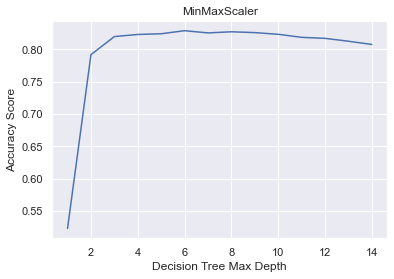

In [77]:
s_accuracy_scores = []
s_max_depths = []

for s_max_depth in range(1, 15):
    s_model = DecisionTreeClassifier(max_depth = s_max_depth)
    s_model.fit(X_train, y_train)

    s_test_prediction = s_model.predict(X_test)
    s_test_accuracy = accuracy_score(y_test, s_test_prediction)

    s_max_depths.append(s_max_depth)
    s_accuracy_scores.append(s_test_accuracy)

ax = sns.lineplot(x = s_max_depths, y = s_accuracy_scores)
ax.set(title='MinMaxScaler', xlabel='Decision Tree Max Depth', ylabel='Accuracy Score')
print(f'Best accuracy score |{max(s_accuracy_scores)}| achieved at max depth |{np.argmax(s_accuracy_scores) + 1}|')

In [26]:
s_dtc = DecisionTreeClassifier(max_depth = 9)
t0=time.time()
s_dtc.fit(X_train, y_train)
print("training time:", round(time.time()-t0, 3), "s")

t1=time.time()
s_dtc_pred = s_dtc.predict(X_test)
print("predict time:", round(time.time()-t1, 3), "s")

print(classification_report(y_test, s_dtc_pred, zero_division=0))

training time: 0.108 s
predict time: 0.0 s
              precision    recall  f1-score   support

         0.0       0.79      0.49      0.61       412
         1.0       0.82      0.88      0.85      1879
         2.0       0.84      0.88      0.86      3170
         3.0       0.80      0.74      0.77      2628
         4.0       0.84      0.88      0.86      2531
         5.0       0.82      0.56      0.66       178

    accuracy                           0.83     10798
   macro avg       0.82      0.74      0.77     10798
weighted avg       0.83      0.83      0.82     10798



>RobustScaler

In [81]:
stars4 = stars.copy()
stars4.head()

scaler = RobustScaler()

stars4['vmag'] = scaler.fit_transform(np.expand_dims(stars4['vmag'], axis=1))
stars4['rad'] = scaler.fit_transform(np.expand_dims(stars4['rad'], axis=1))
stars4['bv'] = scaler.fit_transform(np.expand_dims(stars4['bv'], axis=1))

stars4.head()

,hip,sptype,bv,vmag,rad
0,89954,1.0,-0.559649,-0.744275,0.286791
1,86572,1.0,-0.735088,-0.549618,0.501206
2,87144,1.0,-0.759649,-0.080153,-0.126659
3,87760,1.0,-0.507018,-0.087786,0.014174
4,87482,1.0,-0.503509,0.110687,0.066948


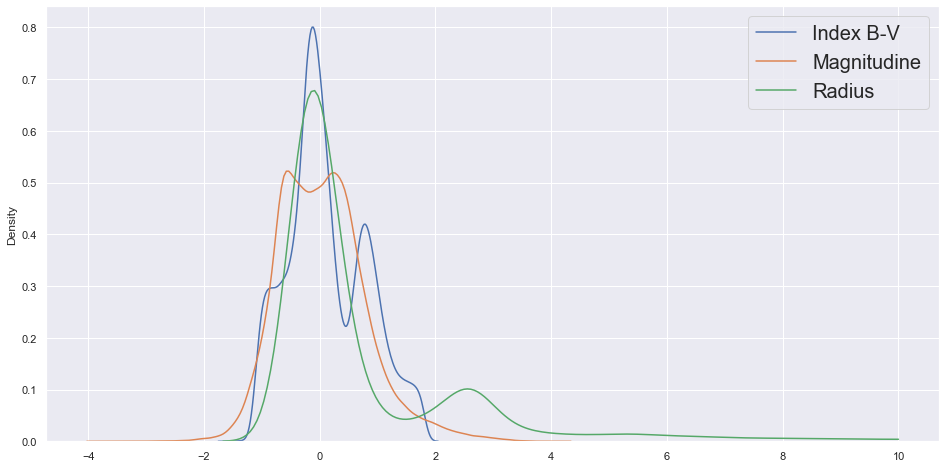

In [25]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(16, 8))
bv = sns.kdeplot(stars4['bv'], label='Index B-V', ax=ax1)
mag = sns.kdeplot(stars4['vmag'], label='Magnitudine', ax=ax1)
rad = sns.kdeplot(stars4['rad'], label='Radius', clip=(-5,10), ax=ax1)
plt.xlabel("")
plt.legend(fontsize=20)

In [82]:
X_train, X_test, y_train, y_test = train_test_split(stars4.drop(['hip','sptype'],axis=1), stars4['sptype'], test_size=0.20)
print("X_train shape is", X_train.shape)
print("X_test shape is", X_test.shape)
print("y_train shape is", y_train.shape)
print("y_test shape is", y_test.shape)

X_train shape is (43191, 3)
X_test shape is (10798, 3)
y_train shape is (43191,)
y_test shape is (10798,)


#### Neural Network

In [45]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(3,)))
model.add(tf.keras.layers.Dense(200,activation = "relu"))
model.add(tf.keras.layers.Dense(300,activation = "relu"))
model.add(tf.keras.layers.Dense(400,activation = "relu"))
model.add(tf.keras.layers.Dense(6,activation = "softmax"))


model.compile(optimizer = "adam",
       loss = 'sparse_categorical_crossentropy',
       metrics=['accuracy'])

In [46]:
model.fit(X_train,y_train, epochs = 100)

Epoch 1/100
1350/1350 [==============================] - 4s 2ms/step - loss: 0.6194 - accuracy: 0.7747
Epoch 2/100
1350/1350 [==============================] - 3s 2ms/step - loss: 0.4664 - accuracy: 0.8120: 0s - loss: 0.4665 - accuracy: 
Epoch 3/100
1350/1350 [==============================] - 3s 3ms/step - loss: 0.4517 - accuracy: 0.8196: 0s - loss: 0.451
Epoch 4/100
1350/1350 [==============================] - 3s 2ms/step - loss: 0.4554 - accuracy: 0.8163
Epoch 5/100
1350/1350 [==============================] - 4s 3ms/step - loss: 0.4417 - accuracy: 0.8198
Epoch 6/100
1350/1350 [==============================] - 3s 2ms/step - loss: 0.4422 - accuracy: 0.8210
Epoch 7/100
1350/1350 [==============================] - 3s 2ms/step - loss: 0.4438 - accuracy: 0.8227
Epoch 8/100
1350/1350 [==============================] - 3s 2ms/step - loss: 0.4429 - accuracy: 0.8220
Epoch 9/100
1350/1350 [==============================] - 3s 2ms/step - loss: 0.4358 - accuracy: 0.8238
Epoch 10/100
1350/1350 

In [47]:
val_loss,val_acc = model.evaluate(X_test,y_test)
print("Loss % = {} , Accuracy % = {} ".format(val_loss*100,val_acc*100))

338/338 [==============================] - 1s 1ms/step - loss: 0.4591 - accuracy: 0.8331
Loss % = 45.91473937034607 , Accuracy % = 83.31172466278076 


#### Logistic Regression

In [43]:
r_logreg = LogisticRegression(max_iter=1000000)

t0=time.time()
r_logreg.fit(X_train, y_train)
print("training time:", round(time.time()-t0, 3), "s")

t1=time.time()
r_pred_lreg = r_logreg.predict(X_test)
print("predict time:", round(time.time()-t1, 3), "s")

print(classification_report(y_test, r_pred_lreg, zero_division=0))

training time: 4.761 s
predict time: 0.0 s
              precision    recall  f1-score   support

         0.0       0.71      0.41      0.52       390
         1.0       0.82      0.86      0.84      1919
         2.0       0.84      0.89      0.86      3199
         3.0       0.80      0.76      0.78      2537
         4.0       0.85      0.88      0.86      2560
         5.0       0.76      0.62      0.68       193

    accuracy                           0.83     10798
   macro avg       0.80      0.74      0.76     10798
weighted avg       0.82      0.83      0.82     10798



#### DecisionTree

Best accuracy score |0.823115391739211| achieved at max depth |8|


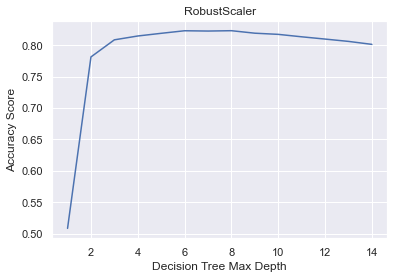

In [84]:
r_accuracy_scores = []
r_max_depths = []

for r_max_depth in range(1, 15):
    r_model = DecisionTreeClassifier(max_depth = r_max_depth)
    r_model.fit(X_train, y_train)

    r_test_prediction = r_model.predict(X_test)
    r_test_accuracy = accuracy_score(y_test, r_test_prediction)

    r_max_depths.append(r_max_depth)
    r_accuracy_scores.append(r_test_accuracy)

ax = sns.lineplot(x = r_max_depths, y = r_accuracy_scores)
ax.set(title='RobustScaler', xlabel='Decision Tree Max Depth', ylabel='Accuracy Score')
print(f'Best accuracy score |{max(r_accuracy_scores)}| achieved at max depth |{np.argmax(r_accuracy_scores) + 1}|')

In [45]:
r_dtc = DecisionTreeClassifier(max_depth = 7)
t0=time.time()
r_dtc.fit(X_train, y_train)
print("training time:", round(time.time()-t0, 3), "s")

t1=time.time()
r_dtc_pred = r_dtc.predict(X_test)
print("predict time:", round(time.time()-t1, 3), "s")

print(classification_report(y_test, r_dtc_pred, zero_division=0))

training time: 0.089 s
predict time: 0.0 s
              precision    recall  f1-score   support

         0.0       0.70      0.54      0.61       390
         1.0       0.83      0.87      0.85      1919
         2.0       0.84      0.89      0.86      3199
         3.0       0.80      0.74      0.76      2537
         4.0       0.85      0.88      0.86      2560
         5.0       0.77      0.60      0.68       193

    accuracy                           0.83     10798
   macro avg       0.80      0.75      0.77     10798
weighted avg       0.82      0.83      0.82     10798



#### RandomForest

Best accuracy score |0.834135951102056| achieved at max depth |11|


[Text(0.5, 0, 'Random Forest Max Depth'), Text(0, 0.5, 'Accuracy Score')]

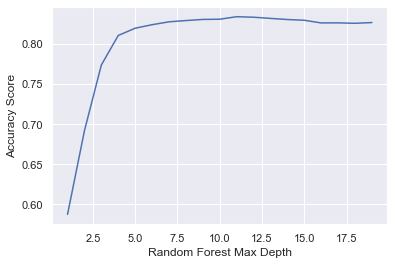

In [46]:
r_accuracy_scores = []
r_max_depths = []

for r_max_depth in range(1, 20):
    r_rfc = RandomForestClassifier(n_estimators=100, max_depth = r_max_depth)
    r_rfc.fit(X_train,y_train)

    r_pred_rfc = r_rfc.predict(X_test)
    r_test_accuracy = accuracy_score(y_test, r_pred_rfc)

    r_max_depths.append(r_max_depth)
    r_accuracy_scores.append(r_test_accuracy)

print(f'Best accuracy score |{max(r_accuracy_scores)}| achieved at max depth |{np.argmax(r_accuracy_scores) + 1}|')

ax = sns.lineplot(x = r_max_depths, y = r_accuracy_scores)
ax.set(xlabel='Random Forest Max Depth', ylabel='Accuracy Score')

In [47]:
r_rfc = RandomForestClassifier(n_estimators=100, max_depth = 11)

t0=time.time()
r_rfc.fit(X_train,y_train)
print("training time:", round(time.time()-t0, 3), "s")

t1=time.time()
r_pred_rfc = r_rfc.predict(X_test)
print("predict time:", round(time.time()-t1, 3), "s")

print(classification_report(y_test, r_pred_rfc, zero_division=0))

training time: 3.52 s
predict time: 0.187 s
              precision    recall  f1-score   support

         0.0       0.72      0.54      0.62       390
         1.0       0.84      0.87      0.85      1919
         2.0       0.85      0.88      0.87      3199
         3.0       0.79      0.76      0.77      2537
         4.0       0.85      0.88      0.86      2560
         5.0       0.79      0.61      0.69       193

    accuracy                           0.83     10798
   macro avg       0.81      0.76      0.78     10798
weighted avg       0.83      0.83      0.83     10798



#### GaussianNB

In [55]:
r_gnc = GaussianNB()

t0=time.time()
r_gnc.fit(X_train,y_train)
print("training time:", round(time.time()-t0, 3), "s")

t1=time.time()
r_pred_gnc = r_gnc.predict(X_test)
print("predict time:", round(time.time()-t1, 3), "s")

print(classification_report(y_test, r_pred_gnc, zero_division=0))

training time: 0.016 s
predict time: 0.004 s
              precision    recall  f1-score   support

         0.0       0.69      0.45      0.55       377
         1.0       0.81      0.84      0.82      1873
         2.0       0.75      0.93      0.83      3210
         3.0       0.71      0.52      0.60      2558
         4.0       0.79      0.77      0.78      2589
         5.0       0.58      0.73      0.65       191

    accuracy                           0.76     10798
   macro avg       0.72      0.71      0.70     10798
weighted avg       0.75      0.76      0.75     10798



#### SVC

In [49]:
r_svc = SVC(kernel='rbf')

t0=time.time()
r_svc.fit(X_train,y_train)
print("training time:", round(time.time()-t0, 3), "s")

t1=time.time()
r_pred_svc = r_svc.predict(X_test)
print("predict time:", round(time.time()-t1, 3), "s")

print(classification_report(y_test, r_pred_svc, zero_division=0))

training time: 19.362 s
predict time: 24.369 s
              precision    recall  f1-score   support

         0.0       0.73      0.35      0.47       390
         1.0       0.81      0.87      0.84      1919
         2.0       0.85      0.88      0.86      3199
         3.0       0.80      0.76      0.78      2537
         4.0       0.85      0.89      0.87      2560
         5.0       0.77      0.60      0.67       193

    accuracy                           0.83     10798
   macro avg       0.80      0.72      0.75     10798
weighted avg       0.82      0.83      0.82     10798



In [50]:
r_svc = SVC(kernel='poly')

t0=time.time()
r_svc.fit(X_train,y_train)
print("training time:", round(time.time()-t0, 3), "s")

t1=time.time()
r_pred_svc = r_svc.predict(X_test)
print("predict time:", round(time.time()-t1, 3), "s")

print(classification_report(y_test, r_pred_svc, zero_division=0))

training time: 89.7 s
predict time: 10.355 s
              precision    recall  f1-score   support

         0.0       0.83      0.08      0.14       390
         1.0       0.68      0.37      0.48      1919
         2.0       0.51      0.99      0.68      3199
         3.0       0.68      0.30      0.42      2537
         4.0       0.87      0.76      0.81      2560
         5.0       0.80      0.61      0.69       193

    accuracy                           0.63     10798
   macro avg       0.73      0.52      0.54     10798
weighted avg       0.68      0.63      0.59     10798



In [51]:
r_svc = SVC(kernel='linear')

t0=time.time()
r_svc.fit(X_train,y_train)
print("training time:", round(time.time()-t0, 3), "s")

t1=time.time()
r_pred_svc = r_svc.predict(X_test)
print("predict time:", round(time.time()-t1, 3), "s")

print(classification_report(y_test, r_pred_svc, zero_division=0))

training time: 15.738 s
predict time: 5.068 s
              precision    recall  f1-score   support

         0.0       0.71      0.48      0.57       390
         1.0       0.83      0.86      0.85      1919
         2.0       0.85      0.88      0.86      3199
         3.0       0.79      0.76      0.78      2537
         4.0       0.85      0.88      0.87      2560
         5.0       0.75      0.63      0.69       193

    accuracy                           0.83     10798
   macro avg       0.80      0.75      0.77     10798
weighted avg       0.83      0.83      0.83     10798



## Scaling Comparison

In [39]:
stars6 = stars.copy()
stars6.head()

scaler = PowerTransformer()

stars6['vmag'] = scaler.fit_transform(np.expand_dims(stars6['vmag'], axis=1))
stars6['rad'] = scaler.fit_transform(np.expand_dims(stars6['rad'], axis=1))
stars6['bv'] = scaler.fit_transform(np.expand_dims(stars6['bv'], axis=1))

stars6.head()

,hip,sptype,bv,vmag,rad
0,89954,1.0,-1.017814,-1.050475,0.288419
1,86572,1.0,-1.348403,-0.753904,0.523545
2,87144,1.0,-1.396505,-0.099218,-0.476787
3,87760,1.0,-0.922776,-0.109350,-0.147866
4,87482,1.0,-0.916503,0.149730,-0.046540


### PowerTransformer

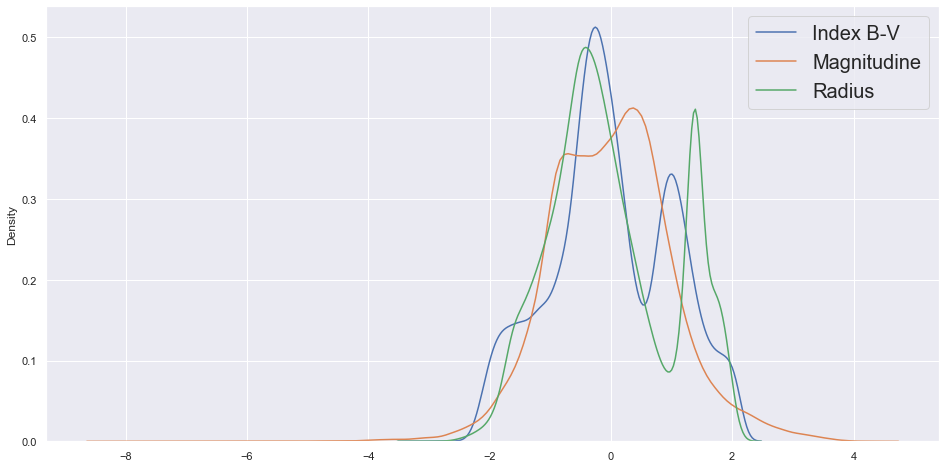

In [40]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(16, 8))
bv = sns.kdeplot(stars6['bv'], label='Index B-V', ax=ax1)
mag = sns.kdeplot(stars6['vmag'], label='Magnitudine', ax=ax1)
rad = sns.kdeplot(stars6['rad'], label='Radius', clip=(-5,5), ax=ax1)
plt.xlabel("")
plt.legend(fontsize=20)

In [43]:
stars7 = stars.copy()
stars7.head()

scaler = MaxAbsScaler()

stars7['vmag'] = scaler.fit_transform(np.expand_dims(stars7['vmag'], axis=1))
stars7['rad'] = scaler.fit_transform(np.expand_dims(stars7['rad'], axis=1))
stars7['bv'] = scaler.fit_transform(np.expand_dims(stars7['bv'], axis=1))

stars7.head()

,hip,sptype,bv,vmag,rad
0,89954,1.0,0.155334,0.044562,0.004447
1,86572,1.0,0.092951,0.083082,0.005483
2,87144,1.0,0.084217,0.175982,0.002449
3,87760,1.0,0.174049,0.174471,0.003129
4,87482,1.0,0.175296,0.213746,0.003384


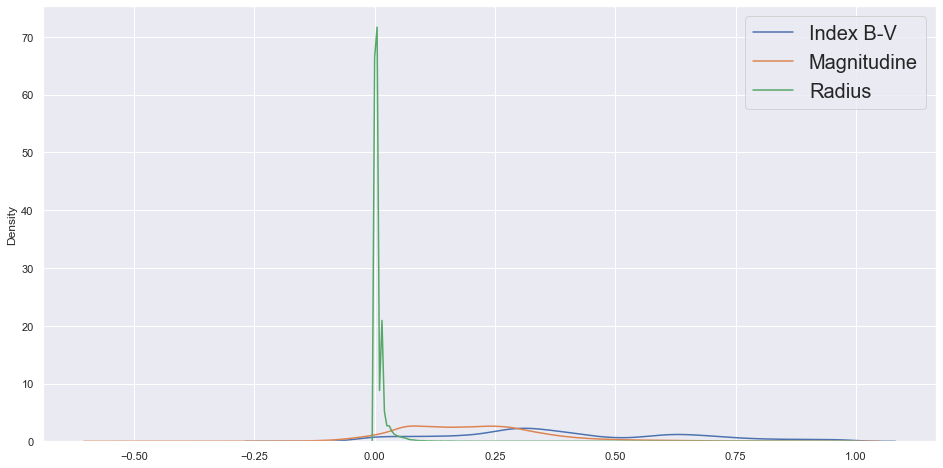

In [44]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(16, 8))
bv = sns.kdeplot(stars7['bv'], label='Index B-V', ax=ax1)
mag = sns.kdeplot(stars7['vmag'], label='Magnitudine', ax=ax1)
rad = sns.kdeplot(stars7['rad'], label='Radius', clip=(-5,5), ax=ax1)
plt.xlabel("")
plt.legend(fontsize=20)

### Feature Importance

In [52]:
f_imp = pd.Series(s_rfc.feature_importances_,index=X_train.columns.values).sort_values(ascending=False)
f_imp

bv      0.592995
rad     0.210693
vmag    0.196312
dtype: float64

## PCA

In [53]:
stars5 = stars.copy()
stars5.head()

,hip,sptype,bv,vmag,rad
0,89954,1.0,0.249,0.59,3.051
1,86572,1.0,0.149,1.10,3.762
2,87144,1.0,0.135,2.33,1.680
3,87760,1.0,0.279,2.31,2.147
4,87482,1.0,0.281,2.83,2.322


In [54]:
features = stars5.drop(['hip','sptype'], axis = 1)
labels = stars5['sptype']

scaler = StandardScaler()
scaled_train_features = scaler.fit_transform(features)

Text(0.5, 0, 'Principal Component Number')

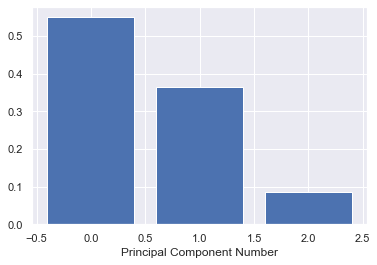

In [55]:
pca = PCA()
pca.fit(scaled_train_features)
explained_var = pca.explained_variance_ratio_

fig, ax = plt.subplots()
ax.bar(range(pca.n_components_), explained_var)
ax.set_xlabel('Principal Component Number')

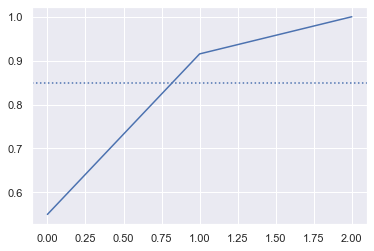

In [56]:
cumulative_exp_var = np.cumsum(explained_var)

fig, ax = plt.subplots()
ax.plot(cumulative_exp_var)
ax.axhline(y=0.85, linestyle=':')

In [57]:
n_component = 1

pca = PCA(n_component)
pca.fit(scaled_train_features)
pca_projection = pca.transform(scaled_train_features)

X_train, X_test, y_train, y_test = train_test_split(pca_projection, labels, test_size=0.20)
print("X_train shape is", X_train.shape)
print("X_test shape is", X_test.shape)
print("y_train shape is", y_train.shape)
print("y_test shape is", y_test.shape)

X_train shape is (43191, 1)
X_test shape is (10798, 1)
y_train shape is (43191,)
y_test shape is (10798,)


#### LogisticRegression

In [58]:
pca_logreg = LogisticRegression(max_iter=1000000)

t0=time.time()
pca_logreg.fit(X_train, y_train)
print("training time:", round(time.time()-t0, 3), "s")

t1=time.time()
pca_pred_lreg = pca_logreg.predict(X_test)
print("predict time:", round(time.time()-t1, 3), "s")

print(classification_report(y_test, pca_pred_lreg, zero_division=0))

training time: 2.187 s
predict time: 0.0 s
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       350
         1.0       0.00      0.00      0.00      1830
         2.0       0.39      0.92      0.55      3160
         3.0       0.23      0.06      0.10      2665
         4.0       0.70      0.71      0.71      2606
         5.0       0.00      0.00      0.00       187

    accuracy                           0.46     10798
   macro avg       0.22      0.28      0.23     10798
weighted avg       0.34      0.46      0.35     10798



#### RandomForest

In [61]:
pca_rfc = RandomForestClassifier(n_estimators=100, max_depth = 5)

t0=time.time()
pca_rfc.fit(X_train,y_train)
print("training time:", round(time.time()-t0, 3), "s")

t1=time.time()
pca_pred_rfc = pca_rfc.predict(X_test)
print("predict time:", round(time.time()-t1, 3), "s")

print(classification_report(y_test, pca_pred_rfc, zero_division=0))

training time: 3.083 s
predict time: 0.094 s
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       350
         1.0       0.00      0.00      0.00      1830
         2.0       0.43      0.86      0.58      3160
         3.0       0.39      0.25      0.30      2665
         4.0       0.70      0.71      0.71      2606
         5.0       0.45      0.27      0.33       187

    accuracy                           0.49     10798
   macro avg       0.33      0.35      0.32     10798
weighted avg       0.40      0.49      0.42     10798



Best accuracy score |0.49147990368586775| achieved at max depth |5|


[Text(0.5, 0, 'Random Forest Max Depth'), Text(0, 0.5, 'Accuracy Score')]

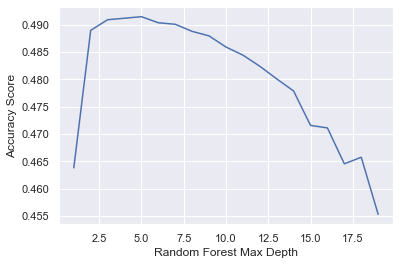

In [60]:
pca_accuracy_scores = []
pca_max_depths = []

for pca_max_depth in range(1, 20):
    pca_rfc = RandomForestClassifier(n_estimators=100, max_depth = pca_max_depth)
    pca_rfc.fit(X_train,y_train)

    pca_pred_rfc = pca_rfc.predict(X_test)
    pca_test_accuracy = accuracy_score(y_test, pca_pred_rfc)

    pca_max_depths.append(pca_max_depth)
    pca_accuracy_scores.append(pca_test_accuracy)

print(f'Best accuracy score |{max(pca_accuracy_scores)}| achieved at max depth |{np.argmax(pca_accuracy_scores) + 1}|')

ax = sns.lineplot(x = pca_max_depths, y = pca_accuracy_scores)
ax.set(xlabel='Random Forest Max Depth', ylabel='Accuracy Score')

#### Gaussian Naive Bayes

In [62]:
pca_gnc = GaussianNB()

t0=time.time()
pca_gnc.fit(X_train,y_train)
print("training time:", round(time.time()-t0, 3), "s")

t1=time.time()
pca_pred_gnc = pca_gnc.predict(X_test)
print("predict time:", round(time.time()-t1, 3), "s")

print(classification_report(y_test, pca_pred_gnc, zero_division=0))

training time: 0.011 s
predict time: 0.003 s
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       350
         1.0       0.00      0.00      0.00      1830
         2.0       0.39      0.97      0.56      3160
         3.0       0.29      0.06      0.10      2665
         4.0       0.72      0.64      0.68      2606
         5.0       0.43      0.16      0.23       187

    accuracy                           0.46     10798
   macro avg       0.31      0.31      0.26     10798
weighted avg       0.37      0.46      0.36     10798



#### Support Vector Classifier 

In [ ]:
pca_svc = SVC(kernel='poly')

t0=time.time()
pca_svc.fit(X_train,y_train)
print("training time:", round(time.time()-t0, 3), "s")

t1=time.time()
pca_pred_svc = pca_svc.predict(X_test)
print("predict time:", round(time.time()-t1, 3), "s")

print(classification_report(y_test, pca_pred_svc, zero_division=0))

#### DecisionTreeClassifier

Best accuracy score |0.8323763659937026| achieved at max depth |8|


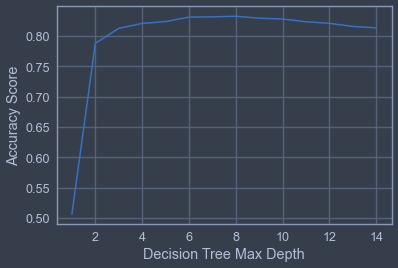

In [31]:
pcad_accuracy_scores = []
pcad_max_depths = []

for pcad_max_depth in range(1, 15):
    pcad_model = DecisionTreeClassifier(max_depth = pcad_max_depth)
    pcad_model.fit(X_train, y_train)

    pcad_test_prediction = pcad_model.predict(X_test)
    pcad_test_accuracy = accuracy_score(y_test, pcad_test_prediction)

    pcad_max_depths.append(pcad_max_depth)
    pcad_accuracy_scores.append(pcad_test_accuracy)

ax = sns.lineplot(x = pcad_max_depths, y = pcad_accuracy_scores)
ax.set(xlabel='Decision Tree Max Depth', ylabel='Accuracy Score')
print(f'Best accuracy score |{max(pcad_accuracy_scores)}| achieved at max depth |{np.argmax(pcad_accuracy_scores) + 1}|')

## Gradient Boosting

In [20]:
stars8 = stars.copy()
stars8.head()

,hip,sptype,bv,vmag,rad
0,89954,1.0,0.249,0.59,3.051
1,86572,1.0,0.149,1.10,3.762
2,87144,1.0,0.135,2.33,1.680
3,87760,1.0,0.279,2.31,2.147
4,87482,1.0,0.281,2.83,2.322


In [21]:
stars8['vmag'] = scaler.fit_transform(np.expand_dims(stars8['vmag'], axis=1))
stars8['rad'] = scaler.fit_transform(np.expand_dims(stars8['rad'], axis=1))
stars8['bv'] = scaler.fit_transform(np.expand_dims(stars8['bv'], axis=1))

stars8.head()

,hip,sptype,bv,vmag,rad
0,89954,1.0,-1.003278,-1.043882,-0.234606
1,86572,1.0,-1.261324,-0.786973,-0.167287
2,87144,1.0,-1.297451,-0.167368,-0.364415
3,87760,1.0,-0.925864,-0.177443,-0.320198
4,87482,1.0,-0.920703,0.084503,-0.303629


In [23]:
X_train, X_val, y_train, y_val = train_test_split(stars8.drop(['hip','sptype'],axis=1), stars8['sptype'], test_size=0.20)

In [25]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=learning_rate, max_features=2, max_depth=3)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_val, y_val)))

Learning rate:  0.05
Accuracy score (training): 0.893
Accuracy score (validation): 0.827
Learning rate:  0.075
Accuracy score (training): 0.911
Accuracy score (validation): 0.824
Learning rate:  0.1
Accuracy score (training): 0.931
Accuracy score (validation): 0.823
Learning rate:  0.25
Accuracy score (training): 0.974
Accuracy score (validation): 0.803
Learning rate:  0.5
Accuracy score (training): 0.929
Accuracy score (validation): 0.788
Learning rate:  0.75
Accuracy score (training): 0.838
Accuracy score (validation): 0.791
Learning rate:  1
Accuracy score (training): 0.204
Accuracy score (validation): 0.199


In [26]:
gb_clf2 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_features=2, max_depth=3)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_val)

print("Confusion Matrix:")
print(confusion_matrix(y_val, predictions))

print("Classification Report")
print(classification_report(y_val, predictions))

Confusion Matrix:
[[ 241  153    6    0    0    0]
 [  64 1650  181    4    0    0]
 [   1  157 2771  252    4    0]
 [   0    1  274 1928  373    1]
 [   0    1    7  268 2252   33]
 [   0    0    0    0   67  109]]
Classification Report
              precision    recall  f1-score   support

         0.0       0.79      0.60      0.68       400
         1.0       0.84      0.87      0.85      1899
         2.0       0.86      0.87      0.86      3185
         3.0       0.79      0.75      0.77      2577
         4.0       0.84      0.88      0.86      2561
         5.0       0.76      0.62      0.68       176

    accuracy                           0.83     10798
   macro avg       0.81      0.76      0.78     10798
weighted avg       0.83      0.83      0.83     10798



### XGBoost

In [27]:
xgb_clf = XGBClassifier(use_label_encoder=False)
xgb_clf.fit(X_train, y_train)
xgb_pred = xgb_clf.predict(X_val)

print("Classification Report")
print(classification_report(y_val, xgb_pred))

[17:01:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classification Report
              precision    recall  f1-score   support

         0.0       0.74      0.58      0.65       400
         1.0       0.84      0.86      0.85      1899
         2.0       0.86      0.87      0.86      3185
         3.0       0.79      0.75      0.77      2577
         4.0       0.84      0.87      0.85      2561
         5.0       0.72      0.61      0.66       176

    accuracy                           0.83     10798
   macro avg       0.80      0.76      0.78     10798
weighted avg       0.83      0.83      0.83     10798



## Bagging